## Import Library

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [43]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [44]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [45]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


## Data Transformation

In [46]:
# Encoding Education
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [47]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity']])

df_scaled = pd.DataFrame(df_scaled, columns=['Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count', 'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity'])
df_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898


In [48]:
# get stastical information on the new dataset
df_scaled.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.158274e-16,1.421085e-16,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-4.973799e-17,-8.171241e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.687691e+00,-1.688120e+00,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.421875e+00,-1.676552e+00
25%,-8.535233e-01,-8.444436e-01,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-5.127476e-01,-8.654451e-01
50%,-3.347132e-02,-7.746485e-02,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,3.963794e-01,-3.124291e-02
75%,8.033504e-01,8.429096e-01,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,1.305506e+00,8.997453e-01
max,1.723192e+00,1.839982e+00,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.305506e+00,1.717971e+00


## Silhouette Score

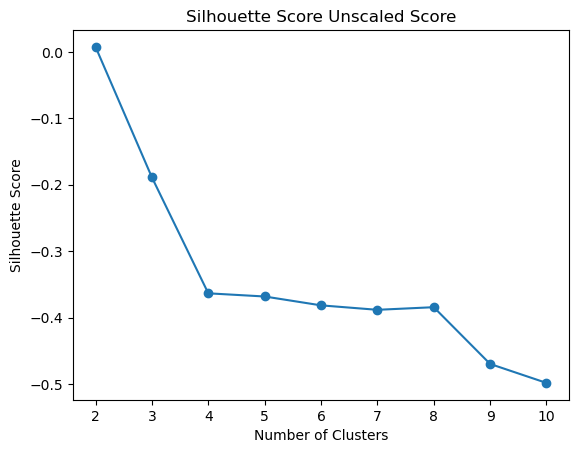

In [49]:
# UNSCALED DATA 
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Unscaled Score")
plt.show()

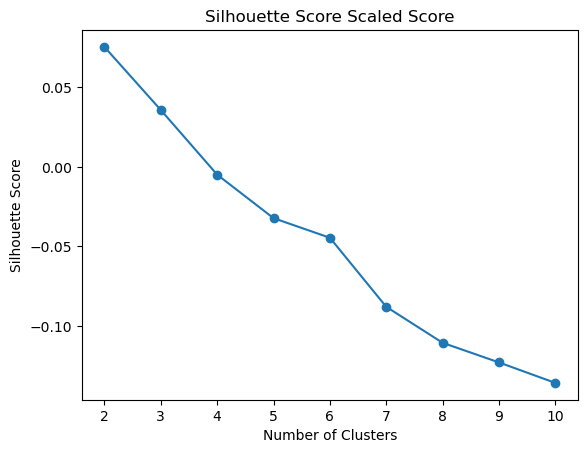

In [50]:
# SCALED DATA 
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Scaled Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


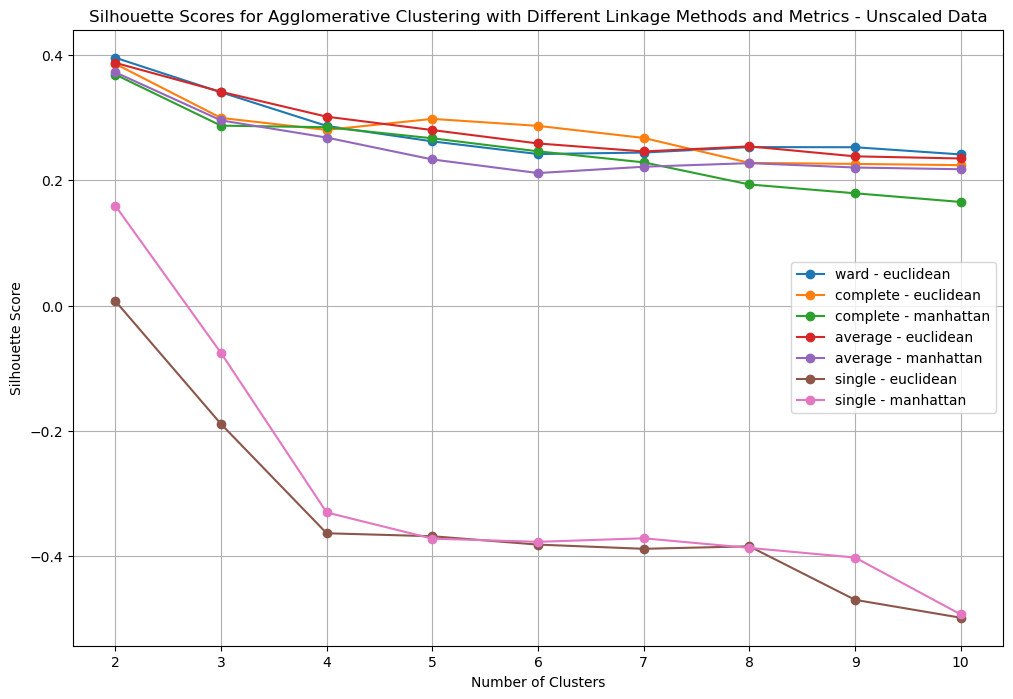

Best Silhouette Score: 0.39572706950108294
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [51]:
# UNSCALED DATA
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df)
            silhouette_avg = silhouette_score(df, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics - Unscaled Data")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Skipping Ward linkage with Manhattan metric (not supported).


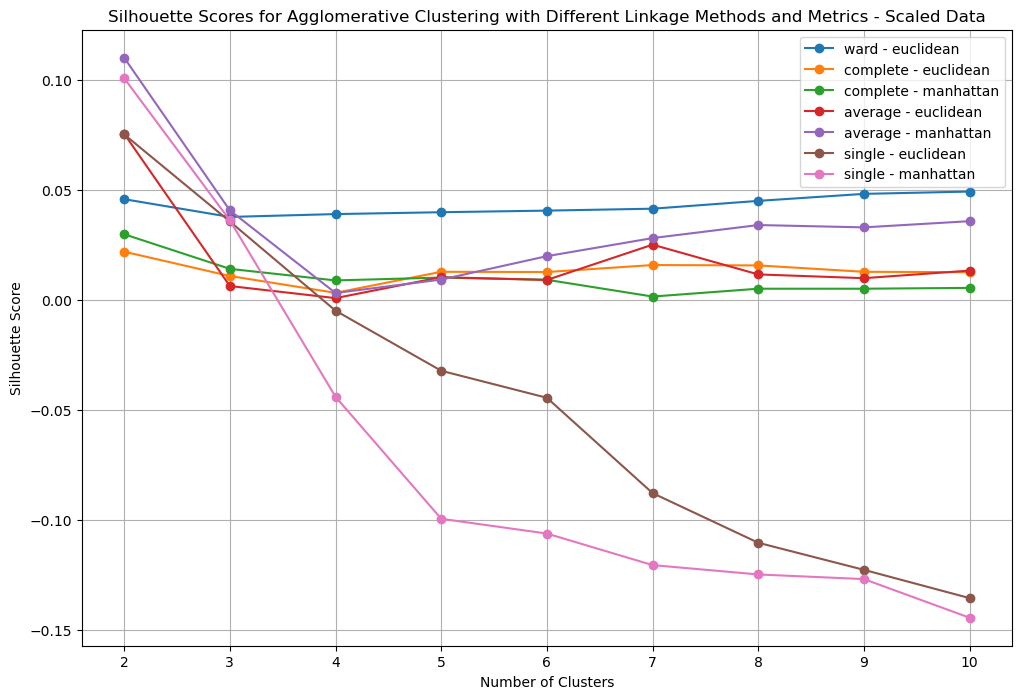

Best Silhouette Score: 0.11028032059064112
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


In [52]:
# SCALED DATA
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics - Scaled Data")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

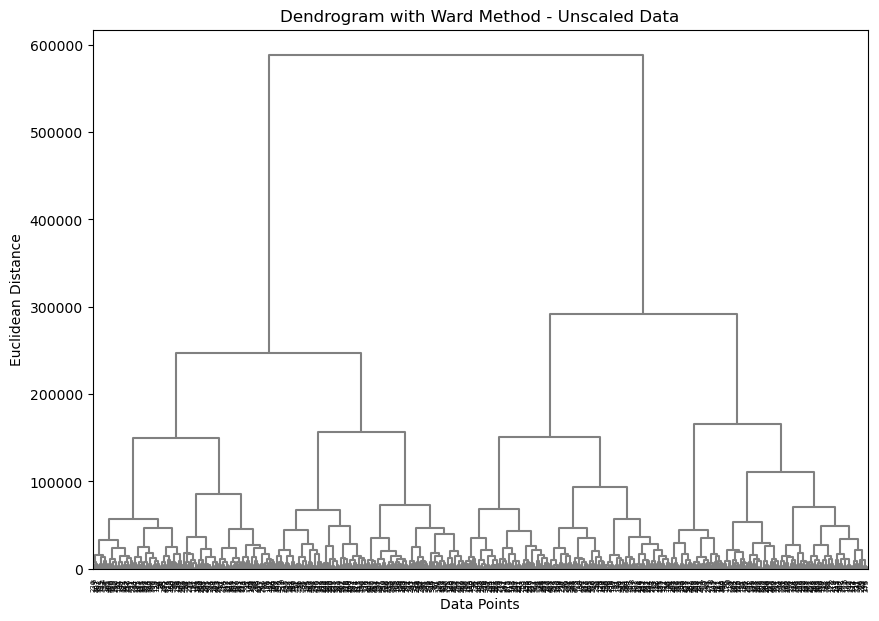

In [53]:
# UNSCALED DATA
# Ward Method
linked = linkage(df, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method - Unscaled Data")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

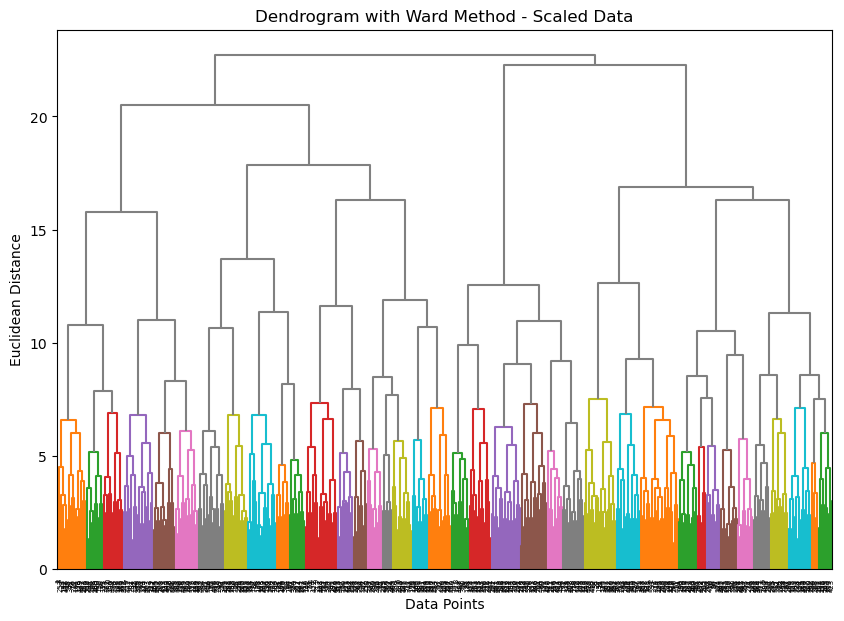

In [54]:
# SCALED DATA
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method - Scaled Data")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

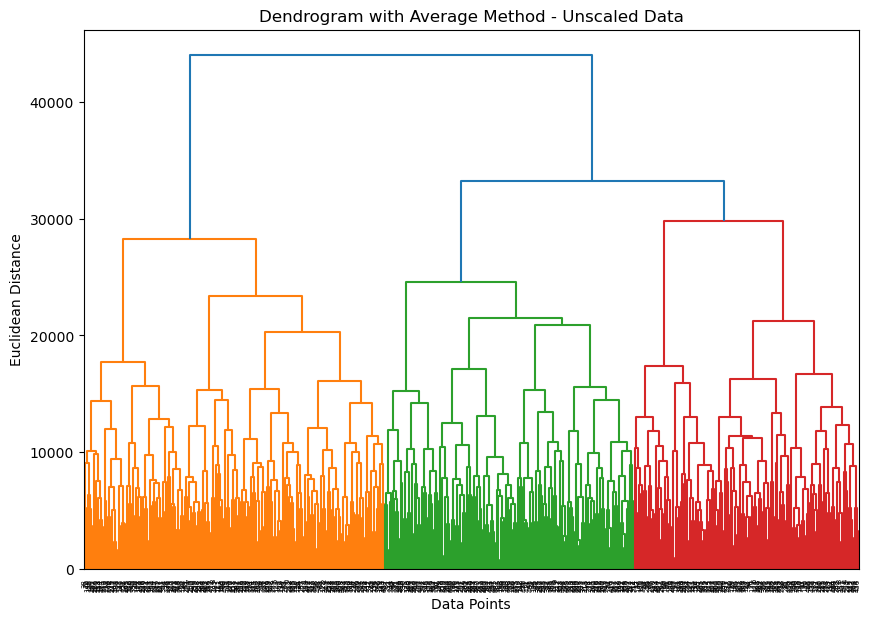

In [55]:
# UNSCALED DATA
# Average Distance
linked = linkage(df, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method - Unscaled Data")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

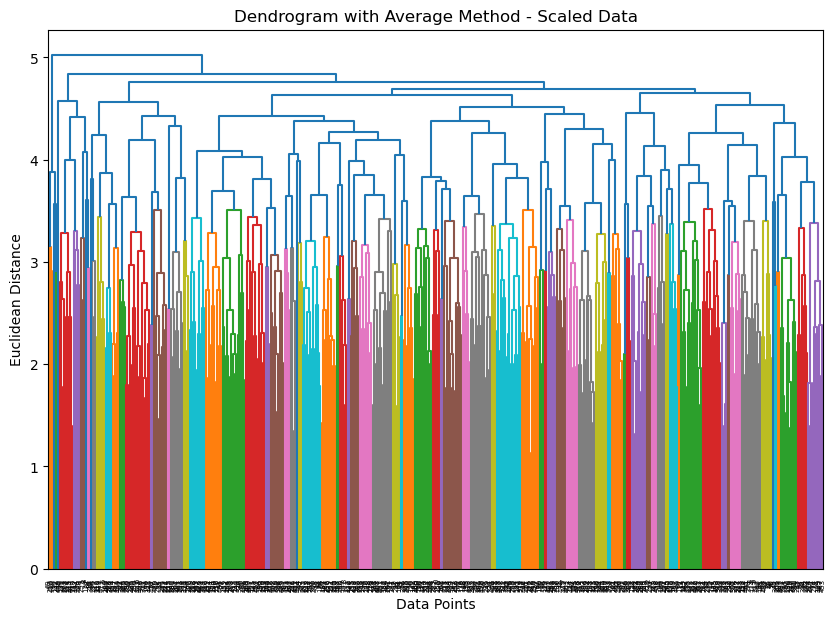

In [56]:
# SCALED DATA
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method - Scaled Data")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [69]:
# UNSCALED DATA
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc_unscaled = agglo.fit_predict(df)

In [70]:
# UNSCALED DATA
# Evaluation
ss_unscaled = silhouette_score(df, y_hc_unscaled)
print(ss_unscaled)

0.3724706844649028


In [71]:
# SCALED DATA
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc_scaled = agglo.fit_predict(df_scaled)

In [72]:
# SCALED DATA
# Evaluation
ss_scaled = silhouette_score(df_scaled, y_hc_scaled)
print(ss_scaled)

0.11028032059064112


## Dendogram Visualization for Hierarchical Clustering Model

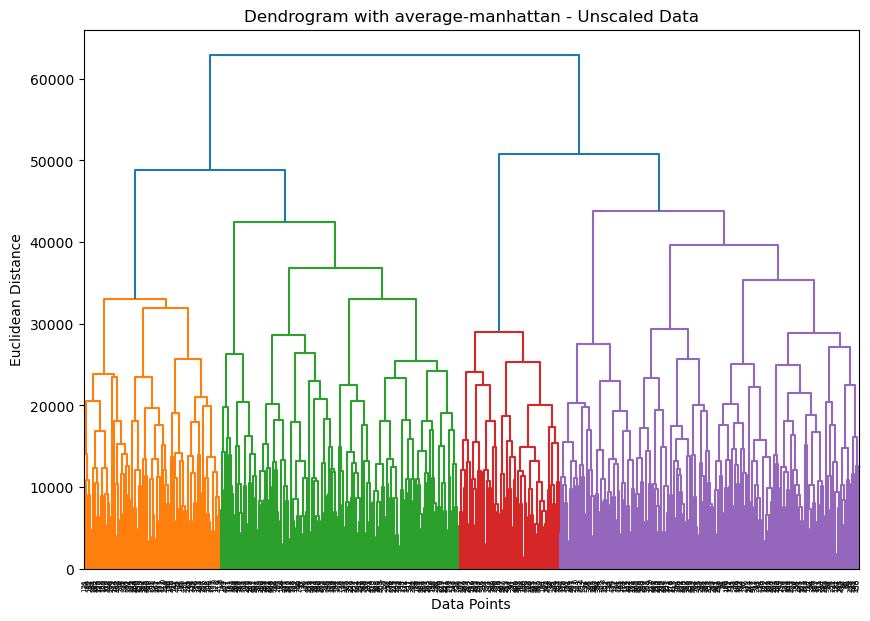

In [ ]:
# UNSCALED DATA
# Average Distance
linked = linkage(df, method=best_linkage, metric='cityblock')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric + " - Unscaled Data")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

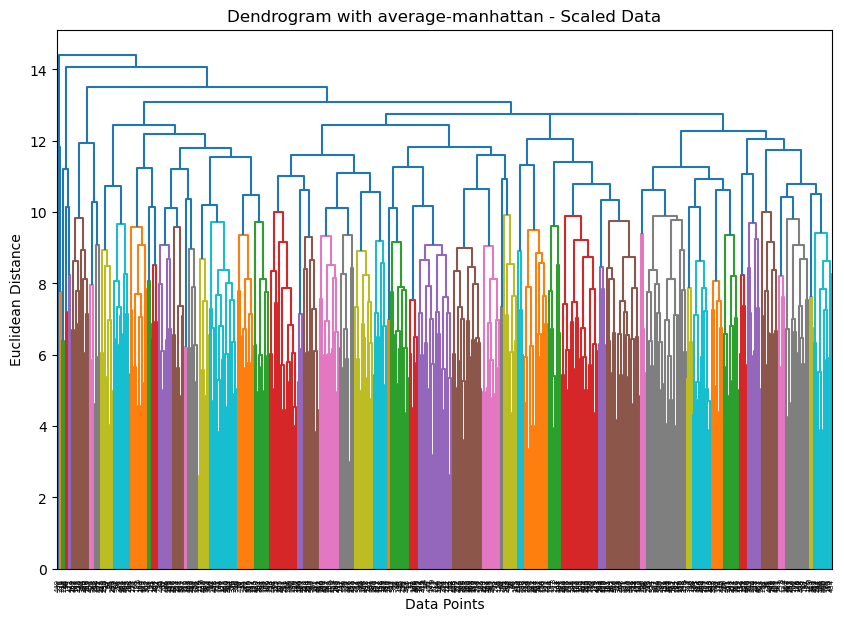

In [67]:
# SCALED DATA
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric='cityblock')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric + " - Scaled Data")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [73]:
# Merge cluster labels dari data unscaled
df['Cluster_Unscaled'] = y_hc_unscaled

# Merge cluster labels dari data scaled
df['Cluster_Scaled'] = y_hc_scaled

# Analyze the clusters with the original values
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo,Cluster_Unscaled,Cluster_Scaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0,1,0
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,1,0
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,1,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,0,0
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,0,0


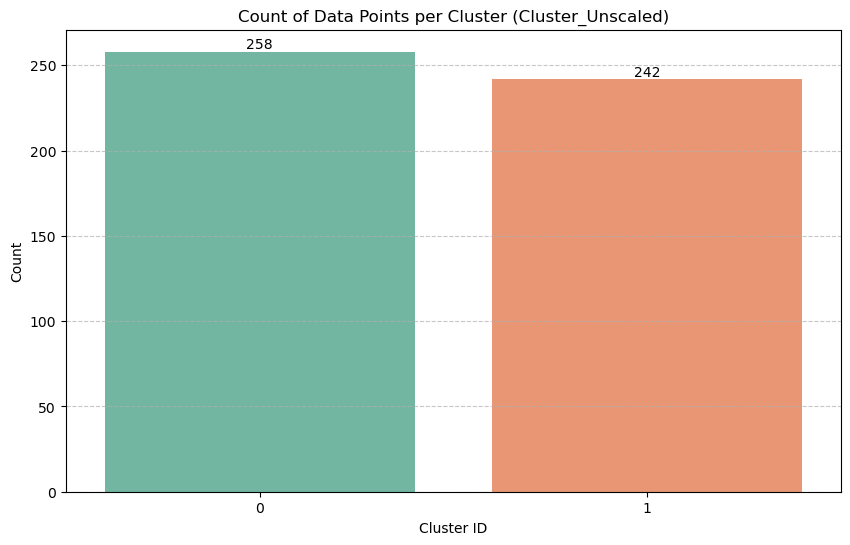

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Cluster_Unscaled' column of df
cluster_counts = df['Cluster_Unscaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Cluster_Unscaled)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

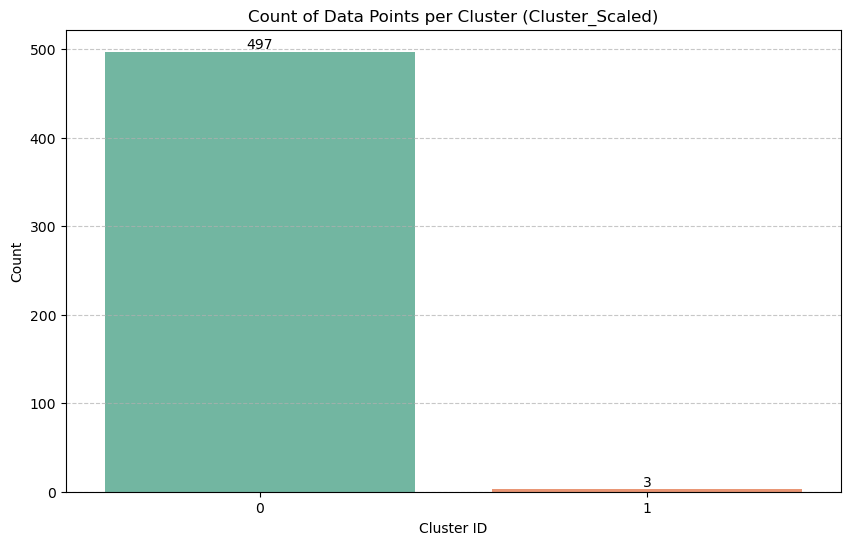

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Cluster_Scaled' column of df
cluster_counts = df['Cluster_Scaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Cluster_Scaled)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

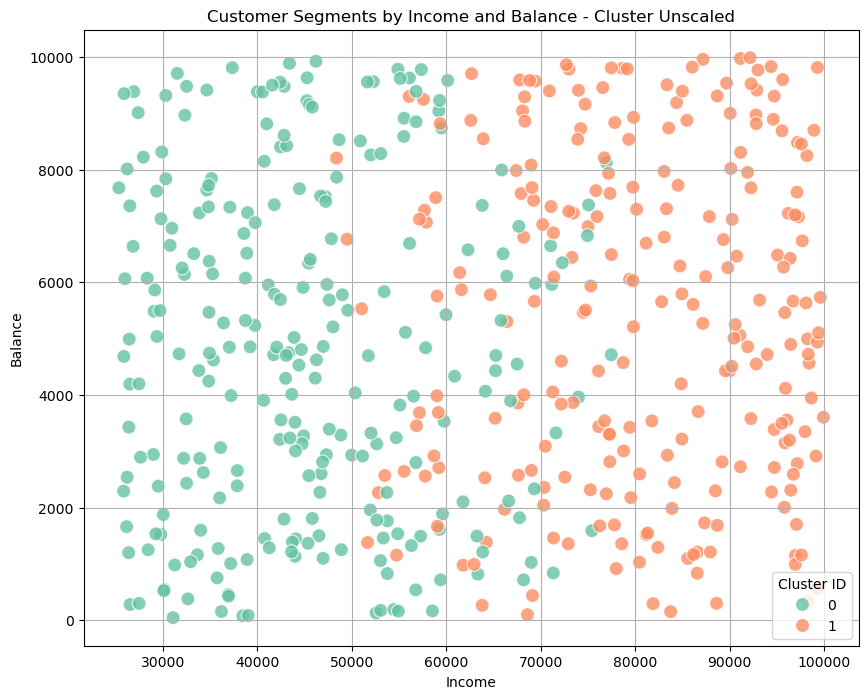

In [82]:
# UNSCALED DATA

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Income', y='Balance', hue='Cluster_Unscaled', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Income and Balance - Cluster Unscaled')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

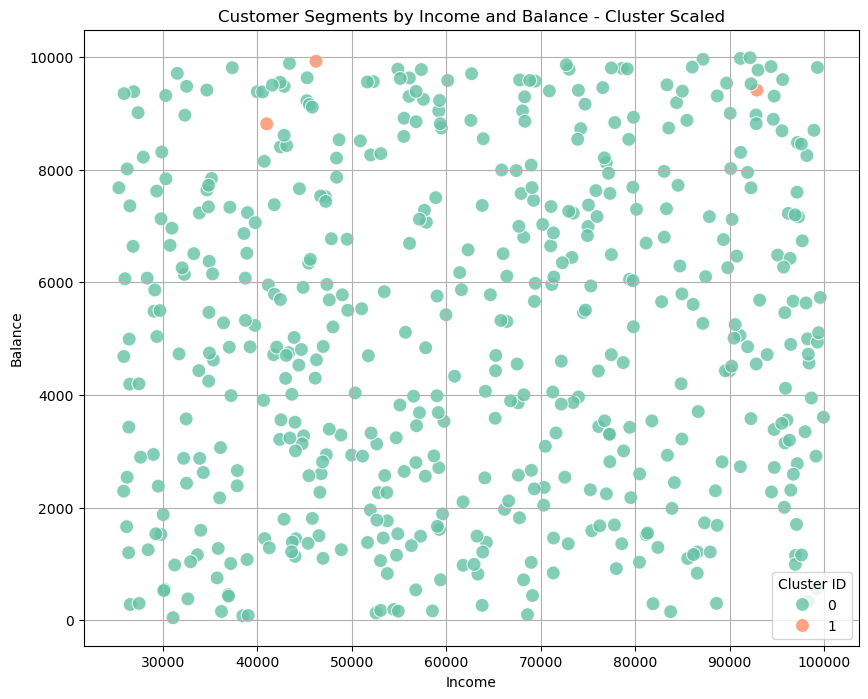

In [83]:
# SCALED DATA

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Income', y='Balance', hue='Cluster_Scaled', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Income and Balance - Cluster Scaled')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [85]:
# UNSCALED DATA
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Balance'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Cluster_Unscaled'].astype(str), # Color points by Unscaled Data cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Unscaled Data Clusters')

fig.show()

In [86]:
# SCALED DATA
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Balance'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Cluster_Scaled'].astype(str), # Color points by Unscaled Data cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Unscaled Data Clusters')

fig.show()

## Statistical Summary for each cluster

In [89]:
# UNSCALED DATA
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc_unscaled).agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Income': ['mean', 'std', 'min', 'max'],
    'Credit_Score': ['mean', 'std', 'min', 'max'],
    'Years_with_Bank': ['mean', 'std', 'min', 'max'],
    'Transaction_Count': ['mean', 'std', 'min', 'max'],
    'Balance': ['mean', 'std', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'std', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'std', 'min', 'max'],
    'Online_Activity': ['mean', 'std', 'min', 'max'],
    'Education': ['first'],
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(cluster_summary)

Age                           Income                \
              mean        std min max          mean           std   
cluster                                                             
0        40.096899  12.892941  18  64  45215.222822  12893.735931   
1        39.917355  13.244015  18  64  80400.347383  13139.811866   

                                  Credit_Score                        \
                 min          max         mean         std  min  max   
cluster                                                                
0        25352.16071  77460.94565   571.399225  161.333040  305  849   
1        48384.69115  99913.52549   558.161157  156.953157  300  844   

        Years_with_Bank                   Transaction_Count                 \
                   mean       std min max              mean        std min   
cluster                                                                      
0             11.317829  4.992577   1  19         50.945736  28.604185   1   
1             10.260331  5.270524   1  19         45.863636  28.716131   1   

                 Balance                                      \
        max         mean          std       min          max   
cluster                                                        
0        99  4768.833067  2927.006294  44.90044  9922.434546   
1        99  5376.254810  2899.063980  99.12599  9984.440444   

        Loan_Approval_Amount                                          \
                        mean           std          min          max   
cluster                                                                
0               29087.188300  14254.198856  1230.459555  49820.52773   
1               21459.771142  13192.853968  1087.318821  49971.89523   

        Credit_Card_Limit                                         \
                     mean          std          min          max   
cluster                                                            
0            10416.380834  5704.001132  1017.345471  19968.52056   
1            10816.363517  5432.460848  1123.831875  19659.11871   

        Purchase_Frequency                                \
                      mean       std       min       max   
cluster                                                    
0                 0.510242  0.281745  0.001914  0.991562   
1                 0.515430  0.284717  0.000813  0.993942   

        Customer_Satisfaction                   Online_Activity            \
                         mean       std min max            mean       std   
cluster                                                                     
0                    2.546512  1.108759   1   4        0.521116  0.289855   
1                    2.582645  1.094777   1   4        0.466158  0.297289   

                            Education  
              min       max      mode  
cluster                                
0        0.001432  0.999897         1  
1        0.001320  0.996199         0

Implikasi Manajerial Berdasarkan Hasil Clustering <br>
## **Cluster 0 —> Karier Awal, Pendapatan Menengah, Aktivitas Online Tinggi**

Profil: 
- Usia rata-rata: ±40 tahun
- Pendapatan: ±45.215
- Credit Score: ±571
- Lama menjadi nasabah: ±11 tahun
- Rata-rata saldo: ±4.769
- Limit kartu kredit: ±29.087
- Frekuensi pembelian online tinggi (Online Activity 0.52)
- Tingkat kepuasan pelanggan sedang (2.54)

Makna: Segmen pelanggan produktif dan stabil finansial, aktif secara digital namun konservatif dalam pengajuan pinjaman.

Strategi:
- Penggunaan layanan digital banking (mobile apps, e-wallet)
- Program loyalty point dan cashback untuk aktivitas online.
- Kembangkan fitur personal finance dashboard agar mereka lebih engaged.
- Campaign edukasi keuangan & upgrade produk ke kelas premium.

Fokus KPI: Online transaction volume, Digital engagement rate, Customer Lifetime Value (CLV), Retention rate

## **Cluster 1 —> Profesional Stabil, Pendapatan Tinggi, Aktivitas Online Moderat**

Profil: 
- Usia rata-rata: ±39,9 tahun
- Pendapatan: ±80.400
- Credit Score: ±558
- Lama menjadi nasabah: ±10 tahun
- Rata-rata saldo: ±5.376
- Limit kartu kredit: ±21.460
- Frekuensi pembelian online moderat (Online Activity 0.46)
- Tingkat kepuasan pelanggan sedikit lebih tinggi (2.58)

Makna: Pelanggan mapan berpendapatan tinggi, berhati-hati dalam transaksi digital, dan lebih menghargai stabilitas serta kepercayaan dibanding promosi agresif.

Strategi:
- Layanan personal banking dan prioritas service.
- Fokus pada relationship management dan retensi jangka panjang.
- Komunikasi personal melalui WhatsApp, email, atau telepon langsung.
- Dorong investasi dan produk tabungan jangka panjang.

Fokus KPI: Repeat transaction rate, Cross-sell ratio, Customer satisfaction index, Net Promoter Score (NPS)
## **Rekomendasi Umum**

Segmentasi Produk:
* Cluster 0: Produk digital-friendly (mobile banking, QRIS).
* Cluster 1: Produk eksklusif seperti investasi, tabungan berjangka, atau kredit properti.

Strategi Harga & Promosi:
* Cluster 0: Campaign digital dan promo online.
* Cluster 1: Edukasi nilai tambah & layanan prioritas.

Strategi Komunikasi:
* Cluster 0: Media sosial, notifikasi aplikasi, kampanye interaktif.
* Cluster 1: Email, telepon langsung, atau pertemuan via relationship manager.

Monitoring:
* Evaluasi ulang cluster setiap 6 bulan untuk memantau perubahan perilaku.
* Perhatikan pelanggan Cluster 0 yang bertransisi ke Cluster 1

In [90]:
# SCALED DATA
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc_scaled).agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Income': ['mean', 'std', 'min', 'max'],
    'Credit_Score': ['mean', 'std', 'min', 'max'],
    'Years_with_Bank': ['mean', 'std', 'min', 'max'],
    'Transaction_Count': ['mean', 'std', 'min', 'max'],
    'Balance': ['mean', 'std', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'std', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'std', 'min', 'max'],
    'Online_Activity': ['mean', 'std', 'min', 'max'],
    'Education': ['first'],
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(cluster_summary)

Age                           Income                \
              mean        std min max          mean           std   
cluster                                                             
0        40.070423  13.066250  18  64  62258.212291  21872.048622   
1        30.000000   2.645751  28  33  60026.682137  28563.257420   

                                  Credit_Score                        \
                 min          max         mean         std  min  max   
cluster                                                                
0        25352.16071  99913.52549   565.561368  159.255123  300  849   
1        40998.39830  92871.12592   470.666667  144.105286  305  567   

        Years_with_Bank                   Transaction_Count                 \
                   mean       std min max              mean        std min   
cluster                                                                      
0             10.798793  5.136421   1  19         48.722334  28.666452   1   
1             12.000000  8.660254   2  17          9.333333   2.516611   7   

                 Balance                                         \
        max         mean          std          min          max   
cluster                                                           
0        99  5036.759571  2915.645544    44.900440  9984.440444   
1        12  9381.029518   556.298427  8810.947001  9922.434546   

        Loan_Approval_Amount                                           \
                        mean           std           min          max   
cluster                                                                 
0               25294.922903  14237.974624   1087.318821  49971.89523   
1               42060.838417   4562.824477  36805.319880  45011.10488   

        Credit_Card_Limit                                         \
                     mean          std          min          max   
cluster                                                            
0            10639.636202  5558.222716  1017.345471  19968.52056   
1             5695.677937  6989.447020  1057.503456  13734.71909   

        Purchase_Frequency                                \
                      mean       std       min       max   
cluster                                                    
0                 0.509923  0.281402  0.000813  0.993942   
1                 0.981597  0.007790  0.973003  0.988192   

        Customer_Satisfaction                   Online_Activity            \
                         mean       std min max            mean       std   
cluster                                                                     
0                    2.563380  1.100086   1   4        0.495256  0.294489   
1                    2.666667  1.527525   1   4        0.371986  0.323032   

                            Education  
              min       max      mode  
cluster                                
0        0.001320  0.999897         0  
1        0.065826  0.709590         0

Implikasi Manajerial Berdasarkan Hasil Clustering <br>
## **Cluster 0 —> Usia Produktif, Pendapatan Menengah ke Tinggi, Aktivitas Digital Stabil**

Profil: 
- Usia rata-rata: ±40 tahun
- Pendapatan: ±62.258
- Credit Score: ±565
- Lama menjadi nasabah: ±10,8 tahun
- Frekuensi transaksi: ±48 kali
- Saldo rata-rata: ±5.036
- Limit kartu kredit: ±25.295
- Aktivitas online: 0,50 (sedang)
- Kepuasan pelanggan: 2,56

Makna: Pelanggan produktif dan stabil finansial, aktif secara digital namun konservatif dalam pinjaman.

Strategi:
- Tingkatkan engagement melalui fitur digital banking dan program loyalitas online.
- Dorong penggunaan produk keuangan tambahan seperti kredit ringan atau asuransi mikro.

Fokus KPI: Online transaction volume, Customer Lifetime Value (CLV),Retention rate, Usage rate produk digital

## **Cluster 1 —> Pelanggan Muda, Pendapatan Menengah, Aktivitas Online Sangat Tinggi**

Profil: 
- Usia rata-rata: ±30 tahun
- Pendapatan: ±60.027
- Credit Score: ±471
- Lama menjadi nasabah: ±12 tahun
- Frekuensi transaksi: ±9 kali (lebih rendah tapi stabil)
- Saldo rata-rata: ±9.381
- Limit kartu kredit: ±42.061
- Aktivitas online: 0,98 (sangat tinggi)
- Kepuasan pelanggan: 2,67

Makna: Pelanggan muda digital-savvy dengan keaktifan tinggi di kanal online dan kepuasan relatif baik.

Strategi:
- Optimalkan program digital engagement seperti cashback online dan gamifikasi transaksi.
- Kembangkan aplikasi mobile dengan UX yang cepat dan personal.
- Dorong adopsi produk keuangan digital (e-wallet, investasi mikro).
- Gunakan campaign media sosial dan influencer marketing.

Fokus KPI: Engagement rate digital, Average Order Value (AOV), Conversion rate (produk digital), Retensi pelanggan 90 hari

## **Rekomendasi Umum**

Segmentasi Produk:
* Cluster 0: Produk finansial utama (tabungan, pinjaman ringan, kredit).
* Cluster 1: Produk berbasis digital & lifestyle (e-wallet, kredit online, cashback app).

Strategi Harga & Promosi:
* Cluster 0: Edukasi dan penawaran loyalitas digital.
* Cluster 1: Kampanye kreatif berbasis media sosial dan referral.

Strategi Komunikasi:
* Cluster 0: Email & in-app notification.
* Cluster 1: Media sosial, push notification, gamifikasi.

Monitoring:
* Pantau migrasi pelanggan dari Cluster 1 → Cluster 0 (transisi ke fase finansial stabil).
* Lakukan re-clustering setiap 6 bulan untuk menangkap perubahan gaya hidup digital.

Which Version Produces Clearer Cluster Separation?
The scaled version produces clearer and more interpretable clusters.

Pada unscaled data, perbedaan antar klaster hanya sedikit terlihat (usia dan perilaku hampir sama), karena variabel dengan skala besar seperti Income, Balance, dan Credit_Score mendominasi perhitungan jarak Euclidean pada algoritma K-Means.
Akibatnya, fitur perilaku (seperti Online_Activity dan Customer_Satisfaction) kurang berpengaruh.

Setelah dilakukan scaling, setiap variabel memiliki skala yang seimbang, sehingga model dapat mendeteksi variasi antar pelanggan berdasarkan demografi, perilaku, dan keuangan secara proporsional.
Hasilnya, cluster menjadi lebih terpisah dan bermakna secara bisnis.